<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/M%C3%A9todo_de_Aceptaci%C3%B3n_y_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Aceptación y Error**

El método de aceptación y rechazo es una técnica para generar números pseudoaleatorios con una distribución de probabilidad específica. La idea principal es generar un número aleatorio a partir de una distribución más simple (usualmente uniforme) y luego aceptarlo o rechazarlo basándonos en una condición que depende de la distribución deseada.

**Pasos del método**


1.   Definir la distribución objetivo: En este caso, la distribución objetivo es una distribución triangular, definida por tres parámetros: a (mínimo), b (moda) y c (máximo).
2.    Encontrar una función envolvente: Se necesita una función que "envuelva" a la distribución objetivo, es decir, que sea mayor o igual a la distribución objetivo en todo su dominio. En el código, la función triangular(x) define la distribución triangular. Se asume que la función envolvente es una distribución uniforme en el intervalo [a, c] multiplicada por un factor de escala b.

3. Generar números aleatorios: Se generan dos números aleatorios uniformes: R1 y R2.

4. Evaluar la condición de aceptación: Se calcula un valor x a partir de R1 usando la fórmula x = a + (c - a) * R1. Luego, se evalúa la condición R2 <= triangular(x) / b. Si la condición es verdadera, se acepta el valor x como un número aleatorio de la distribución objetivo. Si la condición es falsa, se rechaza el valor x y se repiten los pasos 3 y 4.

5. Repetir hasta obtener la cantidad deseada: Los pasos 3 y 4 se repiten hasta obtener la cantidad deseada de números aleatorios de la distribución objetivo.



**Código**

Cálculo de valores del programa
el numero de intentos es:  16620
la media es: 3.0107552710361762
la varianza es: 0.6755734346887684
la desviación estándar es: 0.8219327434095617
Cálculo de valores teóricos
la media teórica es: 3.0
la varianza teórica es: 0.6666666666666666
la desviación estándar teórica es: 0.816496580927726


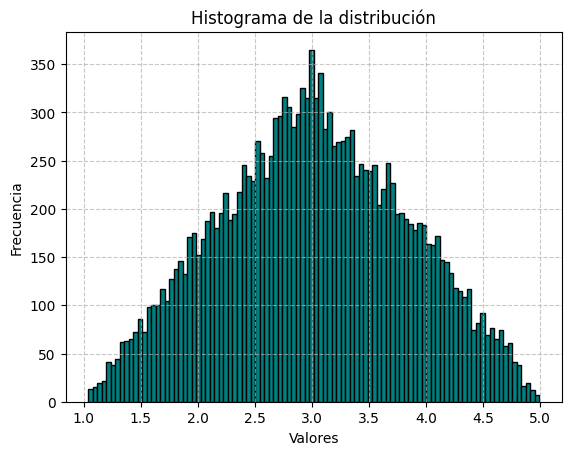

In [7]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a=1  #mínimo
b=3  #moda
c=5  #máximo

#Creamos nuestra función

def triangular(x):
  if a<=x<=b:
    return (2*(x-a))/((c-a)*(b-a))  #parte creciente
  elif b<x<=c:
    return (2*(c-x))/((c-a)*(c-b))    #parte decreciente
  else:
    return 0 #Si esta fuera del dominio

#Aplicamos ahora el método de Aceptación y Rechazo
lista=[]
def aceptación_rechazo(n):
  for _ in range (n):
    R1=rd.random()
    R2=rd.random()

    x=a+(c-a)*R1
    if R2 <= triangular(x)/b:
      lista.append(x)
  return lista

experimentos=aceptación_rechazo(200000)

print('Cálculo de valores del programa')
print('el numero de intentos es: ', len(experimentos))
print('la media es:', np.mean(experimentos))
print('la varianza es:', np.var(experimentos))
print('la desviación estándar es:', np.std(experimentos))

media_teorica = (a + b + c) / 3
varianza_teorica = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
desviacion_teorica = np.sqrt(varianza_teorica)
print('Cálculo de valores teóricos')
print('la media teórica es:', media_teorica)
print('la varianza teórica es:', varianza_teorica)
print('la desviación estándar teórica es:', desviacion_teorica)

plt.hist(experimentos,bins=100, color='teal', edgecolor='black')
plt.title('Histograma de la distribución')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
x_vals = np.linspace(a, c, 1000)
plt.show()

